In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [2]:
from imagebind import data
import torch
from imagebind.models import imagebind_model
from imagebind.models.imagebind_model import ModalityType

device = "cuda:0" if torch.cuda.is_available() else "cpu"

# Instantiate model
model = imagebind_model.imagebind_huge(pretrained=True)
model.eval()
model.to(device)

/root/stable-diffusion-webui/venv/lib/python3.11/site-packages/torchvision/transforms/functional_tensor.py:5: UserWarning: The torchvision.transforms.functional_tensor module is deprecated in 0.15 and will be **removed in 0.17**. Please don't rely on it. You probably just need to use APIs in torchvision.transforms.functional or in torchvision.transforms.v2.functional.
  warnings.warn(
/root/stable-diffusion-webui/venv/lib/python3.11/site-packages/torchvision/transforms/_functional_video.py:6: UserWarning: The 'torchvision.transforms._functional_video' module is deprecated since 0.12 and will be removed in the future. Please use the 'torchvision.transforms.functional' module instead.
  warnings.warn(
/root/stable-diffusion-webui/venv/lib/python3.11/site-packages/torchvision/transforms/_transforms_video.py:22: UserWarning: The 'torchvision.transforms._transforms_video' module is deprecated since 0.12 and will be removed in the future. Please use the 'torchvision.transforms' module instea

100%|██████████| 4.47G/4.47G [00:39<00:00, 122MB/s]  


ImageBindModel(
  (modality_preprocessors): ModuleDict(
    (vision): RGBDTPreprocessor(
      (cls_token): tensor((1, 1, 1280), requires_grad=True)
      
      (rgbt_stem): PatchEmbedGeneric(
        (proj): Sequential(
          (0): PadIm2Video()
          (1): Conv3d(3, 1280, kernel_size=(2, 14, 14), stride=(2, 14, 14), bias=False)
        )
      )
      (pos_embedding_helper): SpatioTemporalPosEmbeddingHelper(
        (pos_embed): tensor((1, 257, 1280), requires_grad=True)
        
      )
    )
    (text): TextPreprocessor(
      (pos_embed): tensor((1, 77, 1024), requires_grad=True)
      (mask): tensor((77, 77), requires_grad=False)
      
      (token_embedding): Embedding(49408, 1024)
    )
    (audio): AudioPreprocessor(
      (cls_token): tensor((1, 1, 768), requires_grad=True)
      
      (rgbt_stem): PatchEmbedGeneric(
        (proj): Conv2d(1, 768, kernel_size=(16, 16), stride=(10, 10), bias=False)
        (norm_layer): LayerNorm((768,), eps=1e-05, elementwise_affine=

In [3]:
text_list=["A dog.", "A car", "A bird"]
image_paths=[".assets/dog_image.jpg", ".assets/car_image.jpg", ".assets/bird_image.jpg"]
audio_paths=[".assets/dog_audio.wav", ".assets/car_audio.wav", ".assets/bird_audio.wav"]

device = "cuda:0" if torch.cuda.is_available() else "cpu"

# Instantiate model
model = imagebind_model.imagebind_huge(pretrained=True)
model.eval()
model.to(device)

# Load data
inputs = {
    ModalityType.TEXT: data.load_and_transform_text(text_list, device),
    ModalityType.VISION: data.load_and_transform_vision_data(image_paths, device),
    ModalityType.AUDIO: data.load_and_transform_audio_data(audio_paths, device),
}

with torch.no_grad():
    embeddings = model(inputs)

print(
    "Vision x Text: ",
    torch.softmax(embeddings[ModalityType.VISION] @ embeddings[ModalityType.TEXT].T, dim=-1),
)
print(
    "Audio x Text: ",
    torch.softmax(embeddings[ModalityType.AUDIO] @ embeddings[ModalityType.TEXT].T, dim=-1),
)
print(
    "Vision x Audio: ",
    torch.softmax(embeddings[ModalityType.VISION] @ embeddings[ModalityType.AUDIO].T, dim=-1),
)

Vision x Text:  tensor([[9.9763e-01, 2.3512e-03, 1.8975e-05],
        [3.3907e-05, 9.9994e-01, 2.3959e-05],
        [4.7819e-05, 1.3439e-02, 9.8651e-01]], device='cuda:0')
Audio x Text:  tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]], device='cuda:0')
Vision x Audio:  tensor([[0.8068, 0.1091, 0.0842],
        [0.1033, 0.7896, 0.1071],
        [0.0018, 0.0022, 0.9960]], device='cuda:0')


In [9]:
# Randomly Yeild IMU data
import os 

def random_imu_data(root='/fastdata/sd-data/fler_guide_imu/imu'):
    imu_files = os.listdir(root)
    imu_file = np.random.choice(imu_files)
    imu_data = np.load(os.path.join(root, imu_file))
    print(imu_file)
    return imu_data
    

indoor_flying-44964.npy
(48, 6)


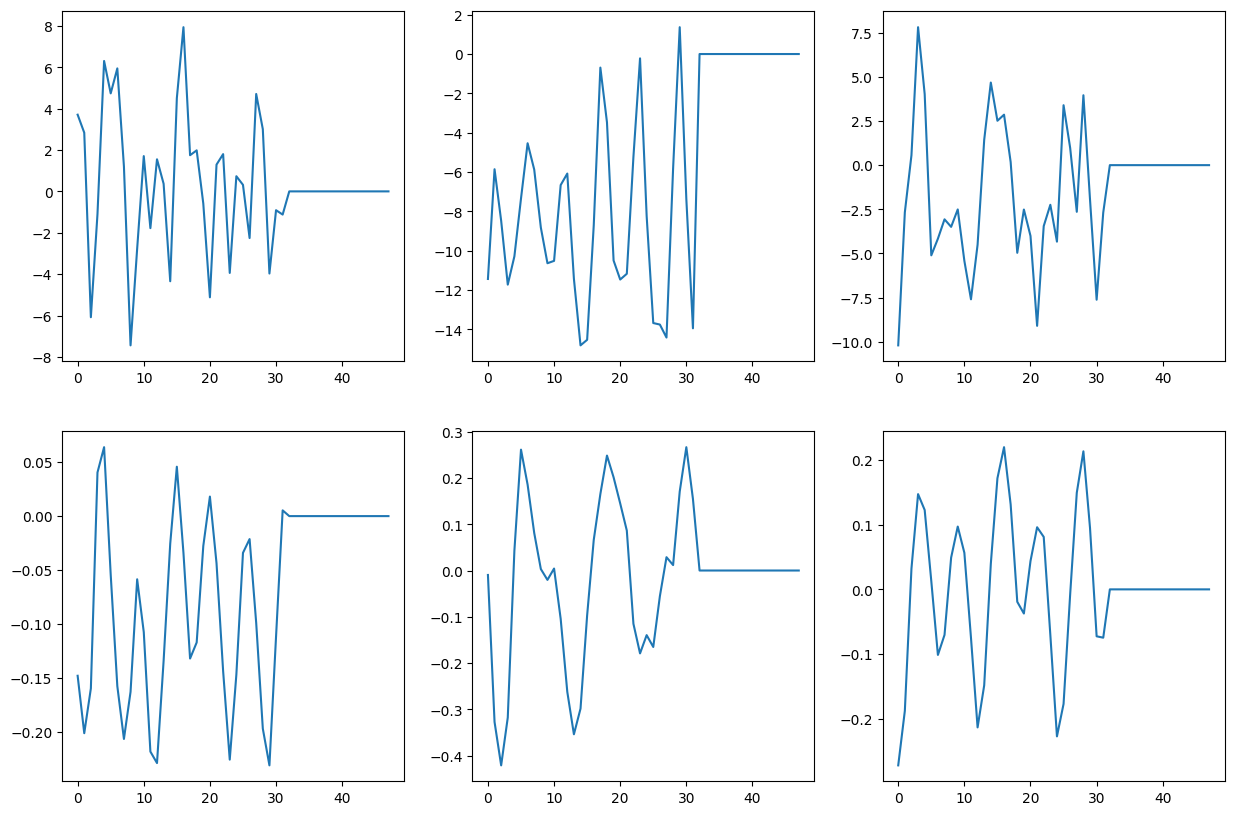

In [26]:
root = '/fastdata/sd-data/fler_guide_imu/imu'
# path = os.path.join(root, 'outdoor_day-20352.npy')
# path = os.path.join(root, 'motorcycle-26009.npy')
# path = os.path.join(root, 'motorcycle-26013.npy')

# path = '/fastdata/sd-data/fler_guide_imu/imu/motorcycle-26009.npy'
# path = '/fastdata/sd-data/fler_guide_imu/imu/motorcycle-26013.npy'
# imu_data = np.load(path)

# pure zero data
# imu_data = np.zeros((48, 6))

# Randomly yield IMU data
imu_data = random_imu_data()
print(imu_data.shape)

# Plot the 6 axis data in separate subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
for i in range(6):
    axs[i//3, i%3].plot(imu_data[:, i])
plt.show()

In [4]:
imu_data = np.random.randn(2000, 6)

In [10]:
# Load data
inputs = {
    ModalityType.IMU: torch.tensor(imu_data, device=device).float().transpose(0, 1).unsqueeze(0),
    # ModalityType.TEXT: data.load_and_transform_text(text_list, device),
    # ModalityType.VISION: data.load_and_transform_vision_data(image_paths, device),
    # ModalityType.AUDIO: data.load_and_transform_audio_data(audio_paths, device),
}

with torch.no_grad():
    embeddings = model(inputs)

imu_embeddings = embeddings[ModalityType.IMU]



In [3]:
from imagebind.imu.imu_encoder import IMUEncoderQuick, process_imu_data

imu_data = np.random.randn(2000, 6)
imu_encoder = IMUEncoderQuick()
imu_encoder.forward(process_imu_data(imu_data))

tensor([[ 0.0811,  0.1343,  0.0187,  ...,  0.0327, -0.2088, -0.1715]],
       device='cuda:0')

In [27]:
imu_data.tolist()

[[3.7074902057647705,
  -11.438612937927246,
  -10.212363243103027,
  -0.148071750998497,
  -0.009587380103766918,
  -0.27164241671562195],
 [2.835703134536743,
  -5.858217716217041,
  -2.672841787338257,
  -0.20133496820926666,
  -0.32703617215156555,
  -0.18748652935028076],
 [-6.083349704742432,
  -8.478368759155273,
  0.5604345798492432,
  -0.15978966653347015,
  -0.42077940702438354,
  0.03195793181657791],
 [-1.0969189405441284,
  -11.7260160446167,
  7.817343711853027,
  0.04048004746437073,
  -0.31744879484176636,
  0.14700649678707123],
 [6.303691387176514,
  -10.2890043258667,
  4.028422832489014,
  0.06391586363315582,
  0.04261057823896408,
  0.12250540405511856],
 [4.737348556518555,
  -7.347919940948486,
  -5.110971450805664,
  -0.05432848259806633,
  0.2609897553920746,
  0.01278317254036665],
 [5.944438457489014,
  -4.536167144775391,
  -4.167334079742432,
  -0.1576591432094574,
  0.1853559911251068,
  -0.10120011121034622],
 [1.2022998332977295,
  -5.877377986907959,
 